In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pl

In [30]:
df = pd.read_csv("data.csv")
print(df)

      PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQua

<Axes: xlabel='Age'>

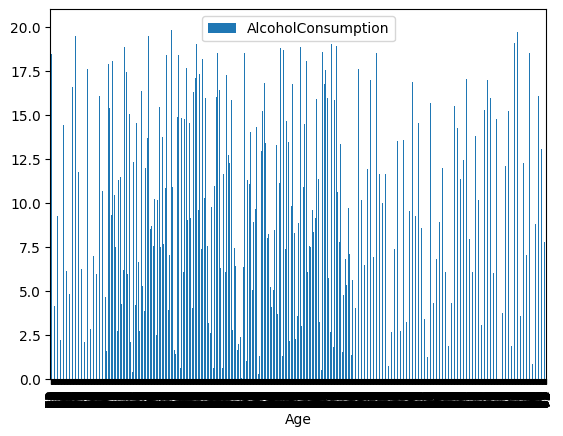

In [31]:
df.plot(x="Age", y="AlcoholConsumption", kind="bar") 

In [39]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
data = pd.read_csv('data.csv')


X = data.drop(columns=['PatientID', 'Diagnosis', 'DoctorInCharge', 'Gender' ,'Ethnicity','EducationLevel'])  # Features (predictors)
y = data['Diagnosis']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=3000, solver='saga')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy on test set: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy on test set: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       277
           1       0.76      0.66      0.71       153

    accuracy                           0.80       430
   macro avg       0.79      0.77      0.78       430
weighted avg       0.80      0.80      0.80       430



c:\Users\devan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [40]:
new_person = {
    'Age': 75,
    'BMI': 17.857902787323138,
    'Smoking': 0,
    'AlcoholConsumption': 18.767260655227215,
    'PhysicalActivity': 1.3606670291415413,
    'DietQuality': 2.904661636047192,
    'SleepQuality': 8.555256019650281,
    'FamilyHistoryAlzheimers': 0,
    'CardiovascularDisease': 0,
    'Diabetes': 0,
    'Depression': 0,
    'HeadInjury': 0,
    'Hypertension': 0,
    'SystolicBP': 152,
    'DiastolicBP': 106,
    'CholesterolTotal': 186.384436151611,
    'CholesterolLDL': 95.41070035813202,
    'CholesterolHDL': 93.6497354072566,
    'CholesterolTriglycerides': 367.9868766873898,
    'MMSE': 6.458060312181194,
    'FunctionalAssessment': 8.687479533704925,
    'MemoryComplaints': 0,
    'BehavioralProblems': 1,
    'ADL': 9.20495234789384,
    'Confusion': 0,
    'Disorientation': 0,
    'PersonalityChanges': 0,
    'DifficultyCompletingTasks': 0,
    'Forgetfulness': 0,
}

# Convert input features to a DataFrame
new_data = pd.DataFrame([new_person])

# Make predictions for the new person
prediction = model.predict(new_data)
probability = model.predict_proba(new_data)[:, 1]  # Probability of having Alzheimer's

if prediction[0] == 1:
    print("Likelihood of Alzheimer's: High")
else:
    print("Likelihood of Alzheimer's: Low")

print(f"Probability: {probability[0]:.2f}")

Likelihood of Alzheimer's: Low
Probability: 0.10


In [41]:
new_person= {
    'Age': 81,
    'BMI': 22.630944676651062,
    'Smoking': 1,
    'AlcoholConsumption': 2.328341104617011,
    'PhysicalActivity': 0.33460526089975406,
    'DietQuality': 4.103678479250944,
    'SleepQuality': 7.85822733016993,
    'FamilyHistoryAlzheimers': 1,
    'CardiovascularDisease': 1,
    'Diabetes': 0,
    'Depression': 0,
    'HeadInjury': 0,
    'Hypertension': 0,
    'SystolicBP': 140,
    'DiastolicBP': 85,
    'CholesterolTotal': 186.44868713392043,
    'CholesterolLDL': 63.322617429162094,
    'CholesterolHDL': 29.61277476986841,
    'CholesterolTriglycerides': 310.5935918588748,
    'MMSE': 10.535127455429516,
    'FunctionalAssessment': 4.877707159773347,
    'MemoryComplaints': 0,
    'BehavioralProblems': 0,
    'ADL': 0.05537868829632919,
    'Confusion': 1,
    'Disorientation': 0,
    'PersonalityChanges': 0,
    'DifficultyCompletingTasks': 1,
    'Forgetfulness': 1,
}

# Convert input features to a DataFrame
new_data = pd.DataFrame([new_person])

# Make predictions for the new person
prediction = model.predict(new_data)
probability = model.predict_proba(new_data)[:, 1]  # Probability of having Alzheimer's

if prediction[0] == 1:
    print("Likelihood of Alzheimer's: High")
else:
    print("Likelihood of Alzheimer's: Low")

print(f"Probability: {probability[0]:.2f}")

Likelihood of Alzheimer's: High
Probability: 0.60
